![head.png](figures/head.jpg)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de


## Tutorial on trading in Deribit 

**Birte Winter**</br>
PhD Candidate, Teaching Assistant (TA)

IWH - Leibniz Institute for Economic Research

birte.winter@iwh-halle.de



In [2]:
# Packages used in this notebook
import requests 
import pandas as pd
import time
import json
from datetime import datetime

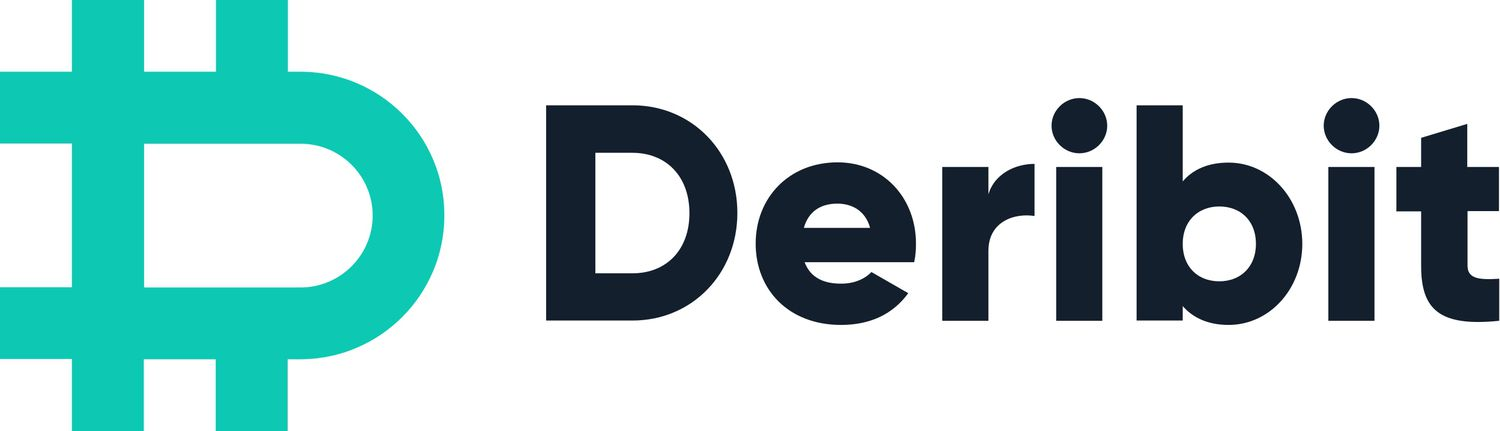

# [Deribit (Test)](https://test.deribit.com/)



is a testing environment, that can be used to test the API. **add further description**

Let's start:
### 1. Create an account [here](https://test.deribit.com/):



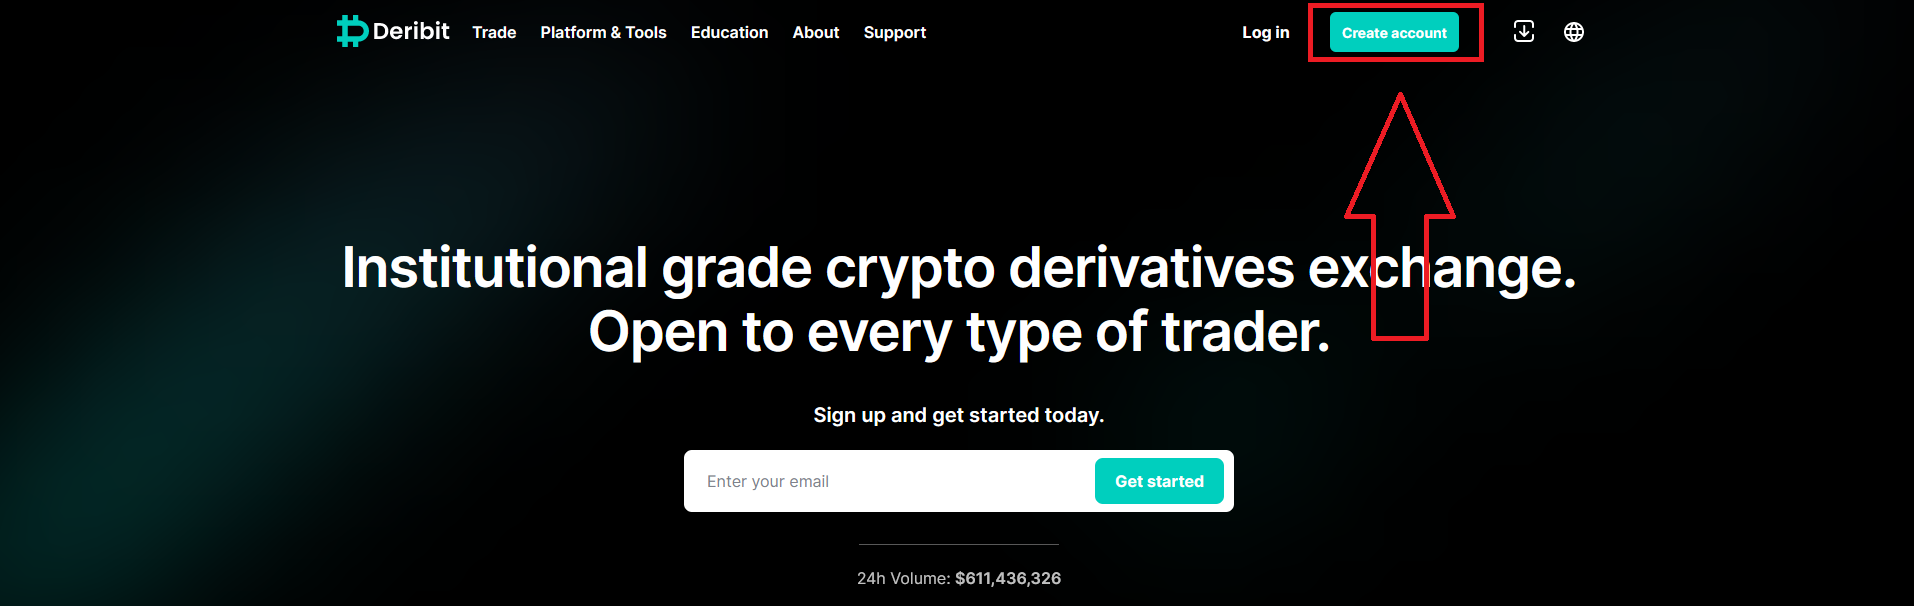

### 2. Get API key:

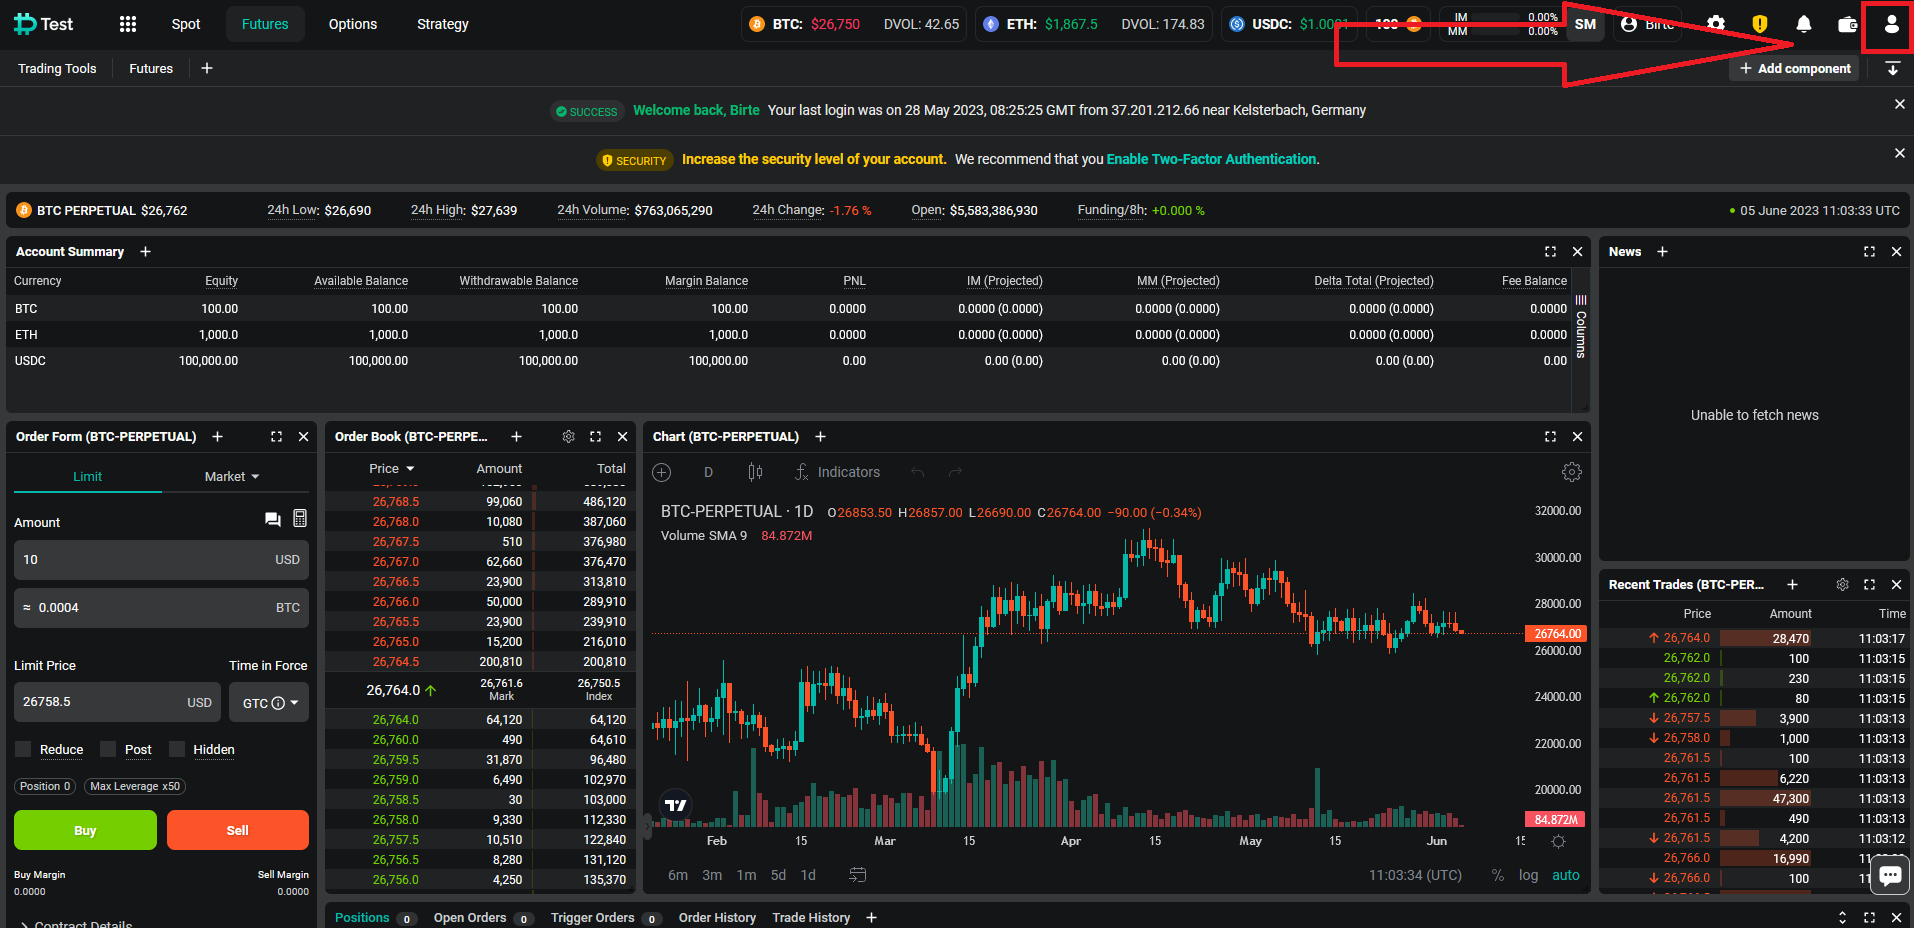
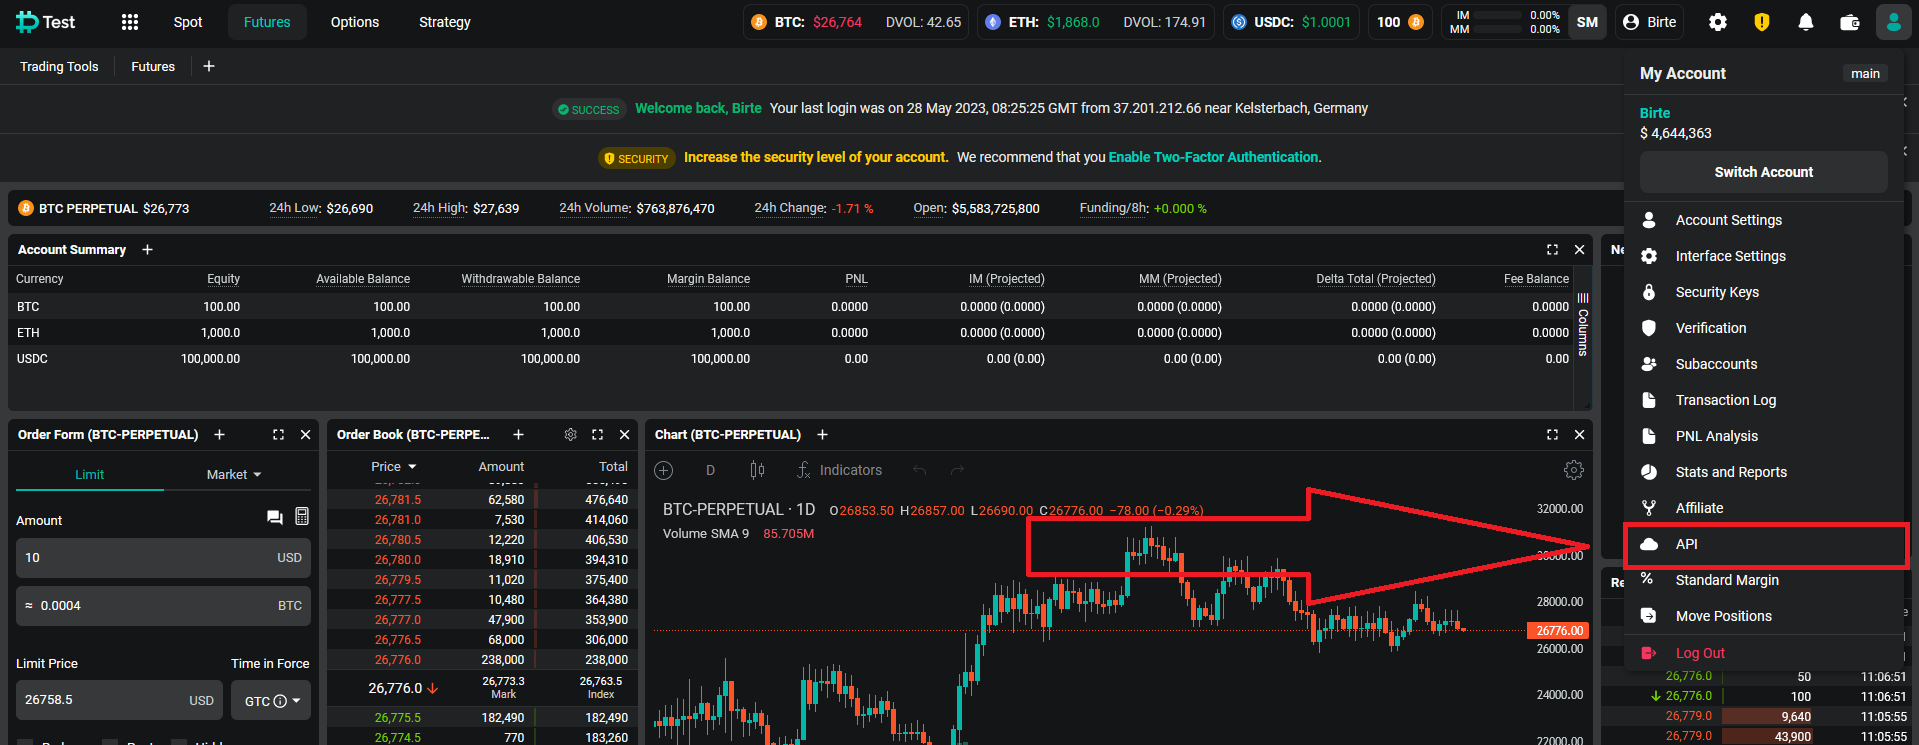

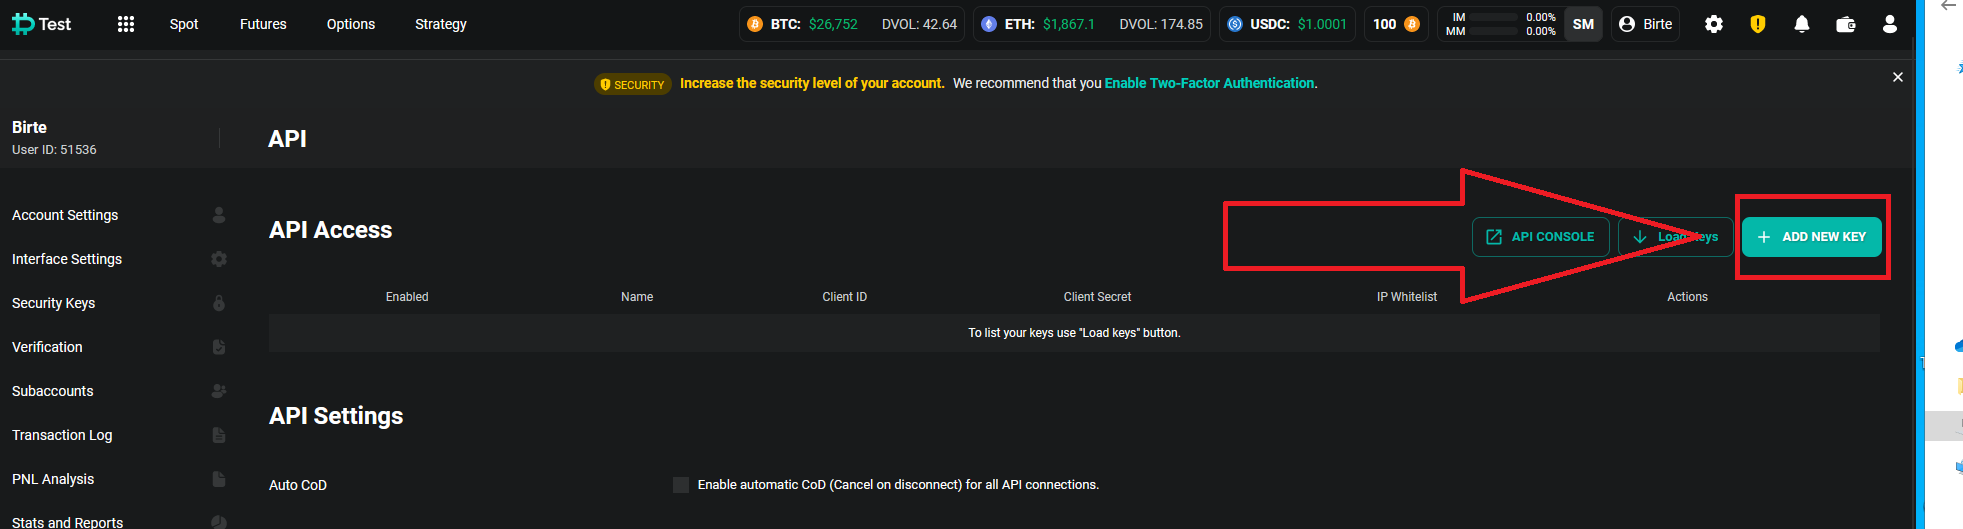

After clicking on *add a new key* assign *write and read* permission of your new API key. Then, click on *Add new key* to create the API key:
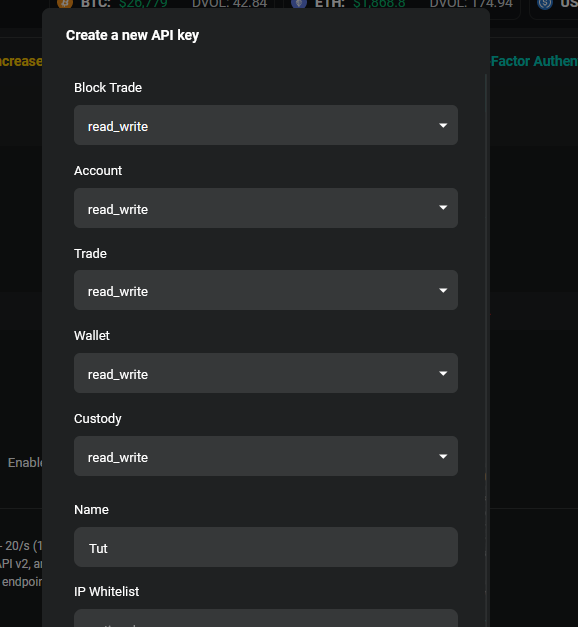

To see your ClientId and Client Secrit (basically your Username and Passwort) click on *Load Keys*. Now, open **pyhton** to connect to the API:

In [3]:
ClientID = "YourID"

ClientSecret = "YourSecret"

response = requests.get("https://test.deribit.com/api/v2/public/auth?client_id="+ClientID+"&client_secret="+
                        ClientSecret+"&grant_type=client_credentials")

response_json = response.json()

response_json["result"]

{'token_type': 'bearer',
 'sid': '51536.mgSLPrF_.rest-WSh2ER8DOlM=',
 'scope': 'account:read_write block_trade:read_write custody:read_write mainaccount name:Tut session:rest-WSh2ER8DOlM= trade:read_write wallet:read_write',
 'refresh_token': '1686677984559.1QqAgys-.bU4D4OPdokApe80jzChFkjpAggwr2BQiNE-np5Jpj6_v0MBXkLB_-2wistaWE7U20xt6_HOVMJswqPEEQwMxVd4wYoTCHF9fH7rGE_aqs0ITgZpru92S6aCTk6EwozqKJj4mAP0e-ZQWcjIHyliGJ5RZTddmwN9fdASPB1vSjEXNGLo7E-inRPcJNa2DVJD49h1Srgjvoddn0qjTgwDAx1Ohzw3p4O04pSTrgf73Gr7XflN63fJhpxjSDiu4KBdM5I9M3aNLKvhhZDa3jjACZwChKro1f4h9gu4hhu3OSCTYuRyXbOCnJwvX7hlvxL0SUtzAmDUB4JDO_rU6CAlsgF1w',
 'expires_in': 900,
 'access_token': '1686074084559.1Y7sprKk.11u44__PJC7_MqBa2xeSl9zwL3VrYegnPT130Fzvqd9_oUkm9lCBokdTC7fRtq2WD3dIiD8HVJ2_dnzAXU3KHVGy4n90wYZRWdOUj-mj0vkjTrR9i4Opfsb2z7DGofrk_5klUCwRU5tvE7lhyPgraTE8Iq9XPiifCNzET1_A20Z3J8ljp-k-Zsm3-E9c2dWE3qE3KCaZ57M-4HDzC7pFtdVOZbYVHz_QIzefyDRIMIVdnvijo0nJQ3-3VnMyhHnDERPJv5jti6LAeCSBCF2eR3R-r_JpjRkKCzhBBeY_6FB41UMFznL6Gny7xUiHob-MaJojG

## Trade with Deribit

Fist, we have to **recieve the current market data** for the BTC_Perpetual on which we want to trade on:

In [22]:
# Define the URL of the endpoint
url = "https://www.deribit.com/api/v2/public/get_book_summary_by_instrument"

# Define the parameters
params = {
    "instrument_name": "BTC-PERPETUAL",  # Cryptocurrency to fetch data for
}

# Send the GET request
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()  # Parse the response to JSON
    print(json.dumps(data, indent=4))  # Print the data
else:
    print(f"Failed to retrieve data: {response.status_code}")


market_data = pd.DataFrame(data["result"])

market_price = market_data['mark_price'].values[0]

print(market_price)

{
    "jsonrpc": "2.0",
    "result": [
        {
            "volume_usd": 415168280.0,
            "volume_notional": 415168280.0,
            "volume": 16050.02506059,
            "quote_currency": "USD",
            "price_change": 3.6999,
            "open_interest": 441481650,
            "mid_price": 26710.25,
            "mark_price": 26710.23,
            "low": 25351.0,
            "last": 26710.5,
            "instrument_name": "BTC-PERPETUAL",
            "high": 26788.0,
            "funding_8h": 6.98e-06,
            "estimated_delivery_price": 26699.24,
            "current_funding": 0.0,
            "creation_timestamp": 1686073398668,
            "bid_price": 26710.0,
            "base_currency": "BTC",
            "ask_price": 26710.5
        }
    ],
    "usIn": 1686073398668102,
    "usOut": 1686073398668862,
    "usDiff": 760,
    "testnet": false
}
26710.23


Then to place a trade, we have to define some parameters:

###  **Required**
* `instrument_name`: BTC-PERPETUAL (string)
* `amount`: requested order size. For perpetual the amount is in USD units (number)

So let's place an **buy** order on **BTC-PERPETUAL** worth 40 USD at the **market price**:

In [25]:
# Define the URL of the endpoint 
url = "https://test.deribit.com/api/v2/private/buy"

# define the parameters 
params = {
    "amount": "40",
    "instrument_name": "BTC-PERPETUAL",
    "label": "test01",
    "type": "market"
    }


# Send the GET request
response = requests.get(url, params=params, auth=(ClientID, ClientSecret))

response_json = response.json()

response_json['result']

{'trades': [{'trade_seq': 101081045,
   'trade_id': '165793343',
   'timestamp': 1686073522133,
   'tick_direction': 0,
   'state': 'filled',
   'self_trade': False,
   'risk_reducing': False,
   'reduce_only': False,
   'profit_loss': 0.0,
   'price': 26730.5,
   'post_only': False,
   'order_type': 'market',
   'order_id': '16449936644',
   'mmp': False,
   'matching_id': None,
   'mark_price': 26727.16,
   'liquidity': 'T',
   'label': 'test01',
   'instrument_name': 'BTC-PERPETUAL',
   'index_price': 26715.17,
   'fee_currency': 'BTC',
   'fee': 7.5e-07,
   'direction': 'buy',
   'api': True,
   'amount': 40.0}],
 'order': {'web': False,
  'time_in_force': 'good_til_cancelled',
  'risk_reducing': False,
  'replaced': False,
  'reduce_only': False,
  'profit_loss': 0.0,
  'price': 27127.5,
  'post_only': False,
  'order_type': 'market',
  'order_state': 'filled',
  'order_id': '16449936644',
  'mmp': False,
  'max_show': 40.0,
  'last_update_timestamp': 1686073522133,
  'label': 'te

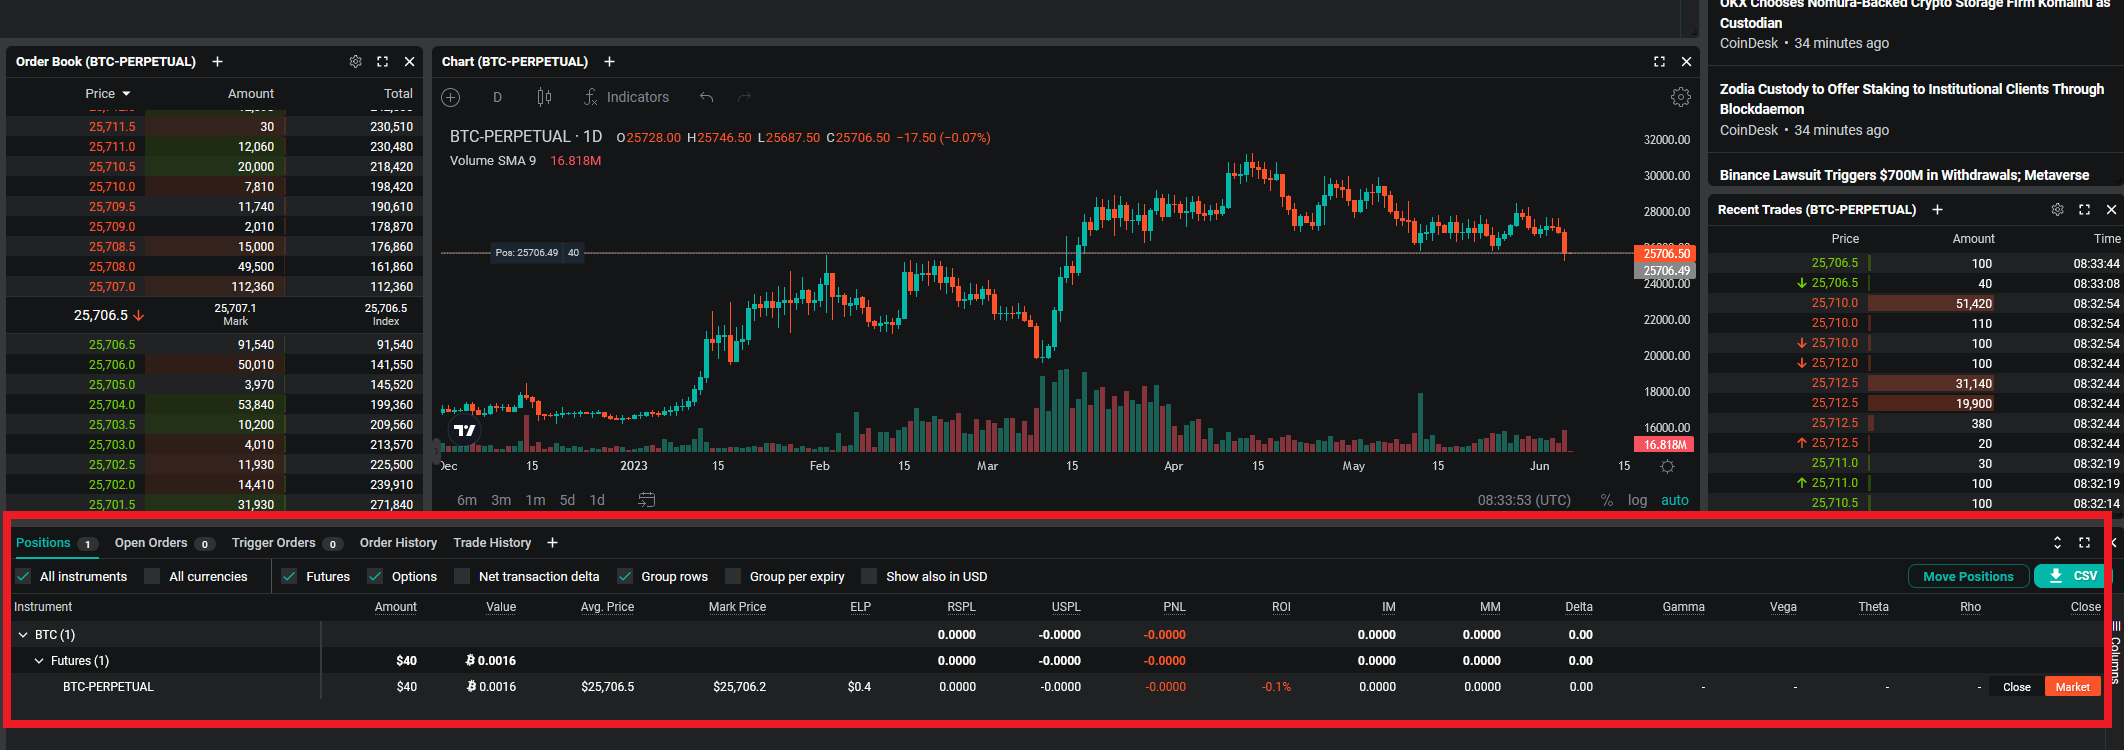

You can also buy Bitcoin Perpetual worth one Bitcoin.

In [28]:
# Define the URL of the endpoint 
url = "https://test.deribit.com/api/v2/private/buy"

# define the parameters 
params = {
    "amount": str(int(market_price.round(0))),
    "instrument_name": "BTC-PERPETUAL",
    "label": "test02",
    "type": "market"
    }


# Send the GET request
response = requests.get(url, params=params, auth=(ClientID, ClientSecret))

response_json = response.json()

response_json['result']

{'trades': [{'trade_seq': 101081121,
   'trade_id': '165793511',
   'timestamp': 1686073609576,
   'tick_direction': 2,
   'state': 'filled',
   'self_trade': False,
   'risk_reducing': False,
   'reduce_only': False,
   'profit_loss': 0.0,
   'price': 26743.5,
   'post_only': False,
   'order_type': 'market',
   'order_id': '16449943689',
   'mmp': False,
   'matching_id': None,
   'mark_price': 26746.41,
   'liquidity': 'T',
   'label': 'test02',
   'instrument_name': 'BTC-PERPETUAL',
   'index_price': 26730.64,
   'fee_currency': 'BTC',
   'fee': 0.00014789,
   'direction': 'buy',
   'api': True,
   'amount': 7910.0},
  {'trade_seq': 101081122,
   'trade_id': '165793512',
   'timestamp': 1686073609576,
   'tick_direction': 0,
   'state': 'filled',
   'self_trade': False,
   'risk_reducing': False,
   'reduce_only': False,
   'profit_loss': 0.0,
   'price': 26744.5,
   'post_only': False,
   'order_type': 'market',
   'order_id': '16449943689',
   'mmp': False,
   'matching_id': None

In [ ]:
# Define the URL of the endpoint 
url = "https://test.deribit.com/api/v2/private/sell"

# define the parameters 
params = {
    "amount": str(int(market_price.round(0))), 
    "instrument_name": "BTC-PERPETUAL",
    "type": "market"
    }


# Send the GET request
response = requests.get(url, params=params, auth=(ClientID, ClientSecret))

response_json = response.json()

response_json['result']

Of cause, there are also further parameters that can be optionally set, which are listed below. In order to understand them, let's go over the basic concepts of trading.

## **Instrument: Bitcoin Perpetual**

A Bitcoin Perpetual is a contract that aims to closely track the Bitcoin price. It is closly related to a futures contract (buy (sell) underlying at predetermined price and date, mark to market) but it does not have a finite term. Thus, they can be held indefinitely without the need to roll over contracts as they approach expiration. Furthermore, Perpetual futures are cash-settled (no delivery of the underlying). 


In order to keep price close to the underlying price (for us Bitcoin), a perpetual uses 'funding-payments' to buyers and sellers of the contract. Hence, if the Perpetual trades higher than the Index, traders that are long need to make funding payments to the shorts (-> price falls). If the Perpetual trades lower than the index the shorts will have to pay the longs (-> price rises). More formally, the funding-payment is given by

$s_{t+1}=(f_{t+1}-f_t)+(d_{t+1}-r_tf_t),$

where $f_t$ is the price of the perpetual at day $t$, $d_{t}$ is the dividend paid to owners of the underlying asset on day $t$, and $r_{t}$ is the return on an alternative asset (expected to be a short-term, low-risk rate) between time $t$ and $t+1$. 
On deribit the funditn-payments are made on microsecond basis to prevent jumps in the price, which assures that the price is close to the Bitcoin price.

Why Perpetual: low trading fees and you can highly leverage your position 

## **Operations: Buy vs. Sell** 

A buy order represents a trader's intention to acquire a specific asset, such as stocks, cryptocurrencies, or commodities. By placing a buy order, the trader expresses their desire to purchase the asset at a particular price. When the buy order is executed, the trader gains ownership of the asset. The trader hopes that the value of the asset will increase, allowing them to sell it at a higher price and potentially make a profit.

On the other hand, a sell order signifies a trader's intention to sell an asset, regardless of whether they currently own it. When placing a sell order, the trader indicates their willingness to sell the asset at a specified price. If the sell order is matched with a corresponding buy order, the trader completes the transaction and transfers the ownership of the asset to the buyer.

In certain scenarios, such as short-selling or derivative markets, traders can place sell orders for assets they don't currently possess. Short-selling involves selling borrowed assets, with the expectation that their price will decline. Traders who engage in short-selling borrow the asset from a broker or another party, sell it at the prevailing market price through a sell order, and aim to buy it back at a lower price in the future to return it to the lender.




## **Order Book**

An order book is a vital component of a financial exchange or trading platform that displays a list of buy and sell orders for a particular asset, such as stocks, cryptocurrencies, or commodities. It acts as a central repository of all the pending orders from various market participants.

Orders in the order book are typically placed by traders or investors who want to buy or sell a specific asset at a particular price. The order book is divided into two main sections: the "bid" side and the "ask" side.

On the bid side, you will find all the buy orders, indicating the price at which traders are willing to purchase the asset. The highest bid, also known as the "best bid," is the highest price a buyer is willing to pay. The bids are arranged in descending order, with the highest bid at the top.

On the ask side, you will find all the sell orders, representing the price at which traders are willing to sell the asset. The lowest ask, also known as the "best ask" or "offer," is the lowest price at which a seller is willing to sell. The asks are arranged in ascending order, with the lowest ask at the top.

When a trader wants to place an order, they specify the price at which they are willing to buy or sell, as well as the quantity they want to trade. If their desired price matches an existing order in the opposite direction, a trade occurs, and the order is fulfilled. If there is no match, the order remains in the order book until it is either canceled by the trader or a matching order becomes available.

The order book provides traders with essential information about the supply and demand dynamics of the asset. By examining the order book, traders can analyze market depth, identify support and resistance levels, and make informed trading decisions based on the existing buy and sell orders.

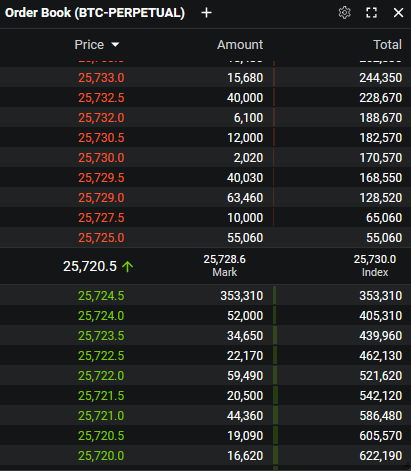



### **Optional parameters**
* `type`: the type of the order, possible types are (string):
    * `limit` (default):A limit order is an instruction to buy (sell) at a specific price or better. It allows you to set the maximum price at which you are willing to buy (minimum price at which you are willing to sell). *When you are interested to enter the instruments market, but at lower price.*
    * `stop_limit`: A stop-limit order combines features of a stop order and a limit order. It involves setting a stop price and a limit price. When the stop price is reached, the order is triggered and becomes a limit order. It is useful for entering or exiting a position when the market reaches a certain price level. *You want to sell if the price drops, but only if it is still above another price.*
    * `take_limit`: The take-limit order is similar to a limit order but is used to exit a position. It allows you to set a specific price at which you want to take profits or cut losses. *Sell position at predetermined price when the target profit is reached.*
    * `market`:  A market order is an instruction to buy (sell) immediately at the best available market price. It provides a quick execution but does not guarantee a specific price. *If you want to immediately execute and care less about the price.*
    * `stop_market`: A stop-market order is triggered when the price reaches a specified stop price. Once triggered, it becomes a market order and is executed at the prevailing market price. *You want to protect your position from significant losses so you immediately sell your position.*
    * `take_market`: The take-market order is similar to the take-limit order. It allows you to sell at the best available market price to take profits or cut losses. *Sell at best possible market price after target profit is reached*
    * `market_limit`: A market-limit order is a combination of a market order and a limit order. It is initially a market order but has a price limit. If the market price reaches or exceeds the specified limit, the order is executed as a limit order at the limit price or better. *You want to buy immediately but sill have maximum price that you are willing to pay.*
    * `trailing_stop`: A trailing stop order is designed to protect profits by adjusting the stop price as the market price moves in your favor. It sets a dynamic stop price that trails the market price at a fixed distance or percentage. If the market price reverses by the specified distance, the order is triggered and becomes a market order. *You want to protect you position from sudden reversals of the price, but want to participate in case of no reverses.*
* `label`: user defined label for the order (string; max. 64 characters)
* `price`: order price in base currency; only for limit and stop_limit orders (number)
* `time_in_force`: specifies how long the order will last (string)
    * `good_til_cancelled` (default): order remains in order book until cancelled
    * `good_til_day`: unfilled order remains in trading book till the end of the trading session 
    * `fill_or_kill`: excecute immediatly and completely or not at all
    * `immediate_or_cancel`: excecute immediatly at any portion; rest is cancelled 
* `max_show`: Maximum amount within an order to be shown to other customers, e.g. `0` for invisible order (number)
* `post_only`: if true, the order is considered post-only. If the new price would cause the order to be filled immediately (as taker), the price will be changed to be just below the spread. Only valid in combination with time_in_force=`good_til_cancelled`(boolean)
* `reject_post_only`: If an order is considered post-only and this field is set to true then the order is put to order book unmodified or request is rejected. Only valid in combination with `post_only` set to true (boolean)
* `reduce_only`: if `true`, the order is considered reduce-only which is intended to only reduce a current position (boolean)
* `trigger_price`: Trigger price, required only for trigger orders: `stop_limit` and `stop_market` (number)
* `trigger_offset`: The max. deviation fom the price peak beyond which the order will be triggered (number)
* `trigger`: Trigger type; required for `Stop-loss`, `Take-profit` and `Trailing` trigger orders (string)
    * `index_price`
    * `mark_price`
    * `last_price`
* `mmp`: Order MMP flag for type `limit`